# Exercise


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
from env import get_db_url

In [3]:
def get_store_df():

    filename = "store.csv"
    if os.path.isfile(filename):

        df = pd.read_csv(filename, index_col=0)
    # else the file is created using this query
    else:
        url = get_db_url('tsa_item_demand')
        df = pd.read_sql('''SELECT * FROM items 
                            LEFT JOIN sales USING (item_id)
                            LEFT JOIN stores USING (store_id)
                            ;''', url)

        df.to_csv(filename)
        
    return df

In [4]:
df = get_store_df()

In [5]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


## DataFrame Info

In [6]:
df.shape


(913000, 14)

In [7]:
df.dtypes

store_id           int64
item_id            int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_date         object
sale_amount        int64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
dtype: object

# Using your store items data:

## 1. Convert date column to datetime format.

## Data Frame Date Info

In [8]:
df.sale_date = df.sale_date.astype('datetime64')

In [55]:
def convert_to_dt():
    df = get_store_df()
    df.sale_date = df.sale_date.astype('datetime64')
    
    return df

In [67]:
convert_to_dt().dtypes

store_id                  int64
item_id                   int64
item_upc14                int64
item_upc12                int64
item_brand               object
item_name                object
item_price              float64
sale_id                   int64
sale_date        datetime64[ns]
sale_amount               int64
store_address            object
store_zipcode             int64
store_city               object
store_state              object
dtype: object

## 3. Set the index to be the datetime variable.

In [9]:
df = df.set_index('sale_date')

In [10]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [11]:
df = df.sort_index()

In [12]:
df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,7,12,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,211817,26,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,7,46,35457770664,35457770664,Mama Marys,Pizza Sauce,4.65,832657,27,12018 Perrin Beitel Rd,78217,San Antonio,TX


In [14]:
df.dtypes

store_id           int64
item_id            int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_amount        int64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
dtype: object

In [91]:
def set_dt_index():
    df = convert_to_dt()
    df = df.set_index('sale_date')
    
    return df

In [93]:
set_dt_index()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object', name='sale_date', length=913000)

In [65]:
set_dt_index().dtypes

store_id           int64
item_id            int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_amount        int64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
dtype: object

## Convert theses numeric columns to object

In [17]:
df[['item_upc14', 'item_upc12', 'store_zipcode']] = df[['item_upc14', 'item_upc12', 'store_zipcode']].astype(str)

In [18]:
df.dtypes

store_id           int64
item_id            int64
item_upc14        object
item_upc12        object
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_amount        int64
store_address     object
store_zipcode     object
store_city        object
store_state       object
dtype: object

In [94]:
def clean_df():
    df = set_dt_index()
    
    df[['item_upc14', 'item_upc12', 'store_zipcode']] = df[['item_upc14', 'item_upc12', 'store_zipcode']].astype(str)
    
    return df

In [96]:
clean_df()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912996,63,8503 NW Military Hwy,78231,San Antonio,TX
2017-12-28,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912997,59,8503 NW Military Hwy,78231,San Antonio,TX
2017-12-29,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912998,74,8503 NW Military Hwy,78231,San Antonio,TX


## Range of Dates

In [19]:
print('Date Range:', df.index.min(), 'to', df.index.max())

Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00


## Histogram of features

In [22]:
df.columns

Index(['store_id', 'item_id', 'item_upc14', 'item_upc12', 'item_brand',
       'item_name', 'item_price', 'sale_id', 'sale_amount', 'store_address',
       'store_zipcode', 'store_city', 'store_state'],
      dtype='object')

store_id


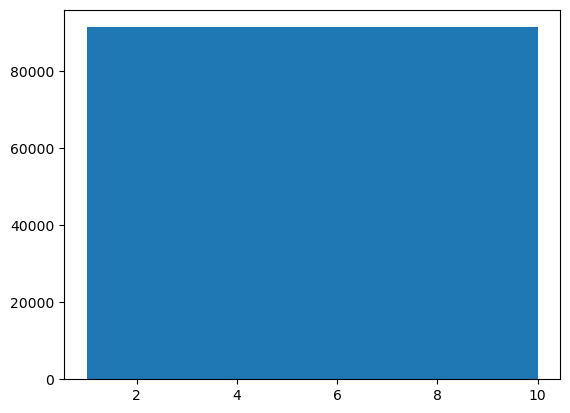

item_id


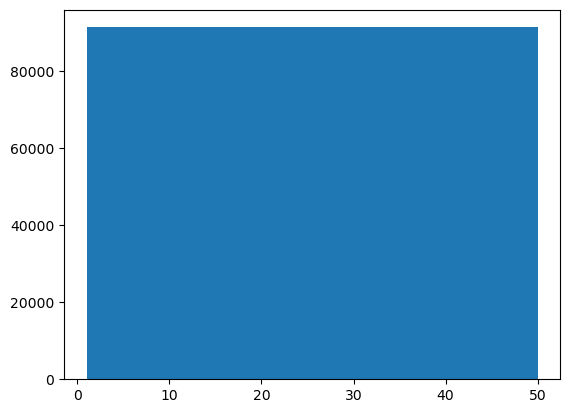

item_upc14


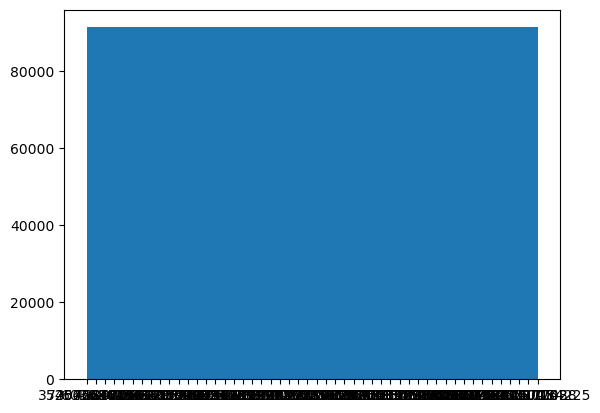

item_upc12


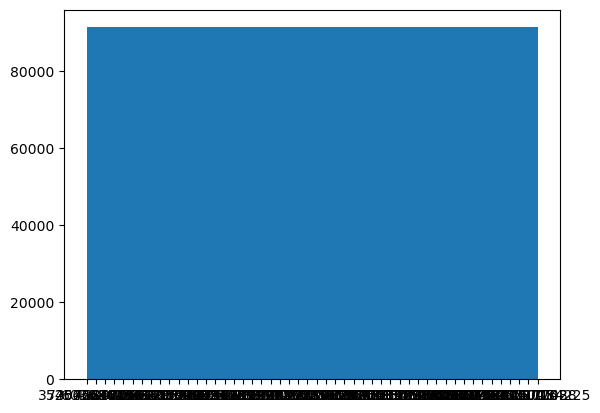

item_brand


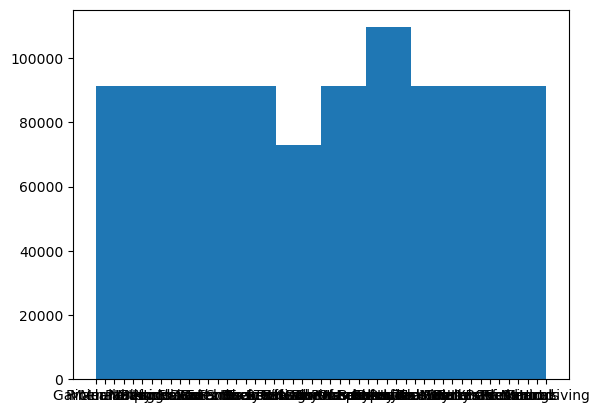

item_name


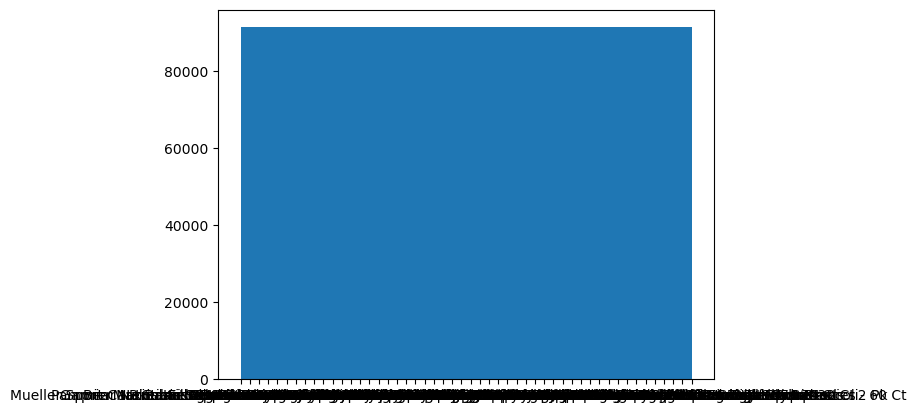

item_price


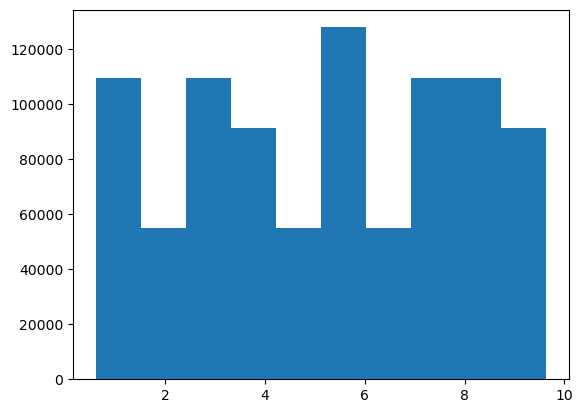

sale_id


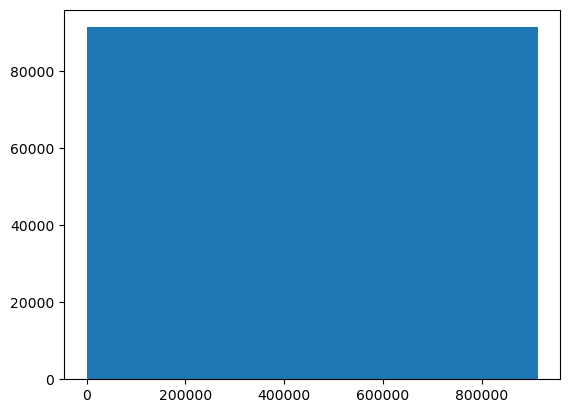

sale_amount


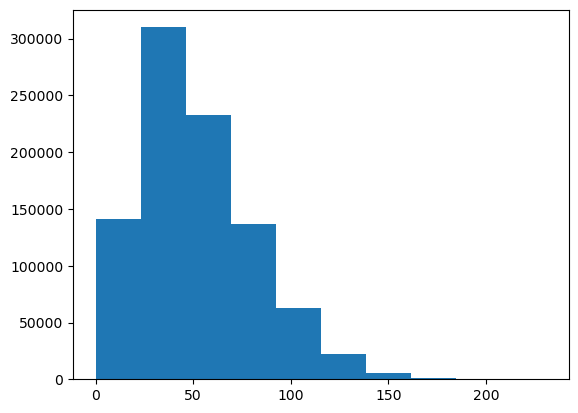

store_address


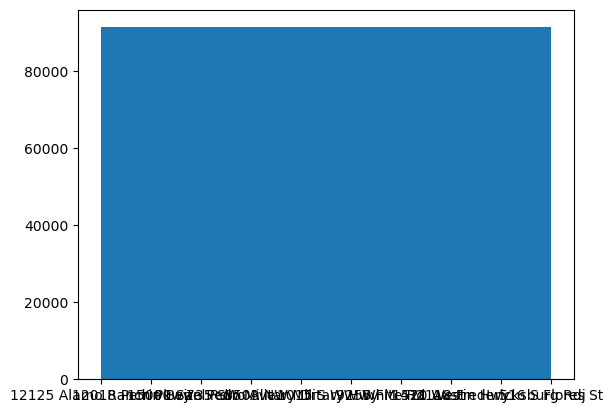

store_zipcode


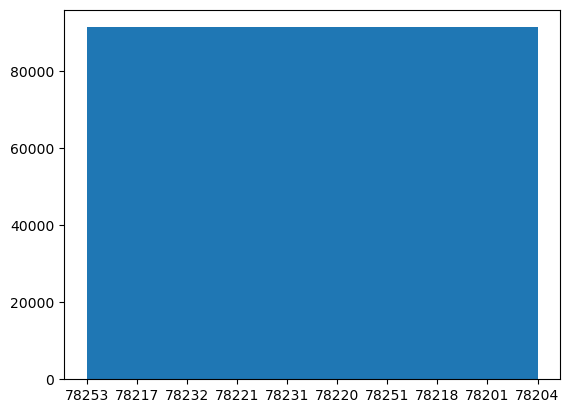

store_city


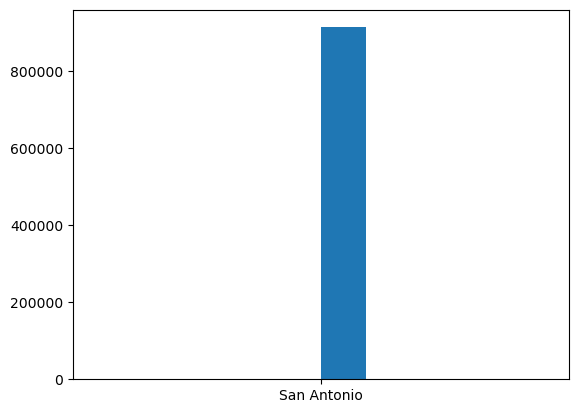

store_state


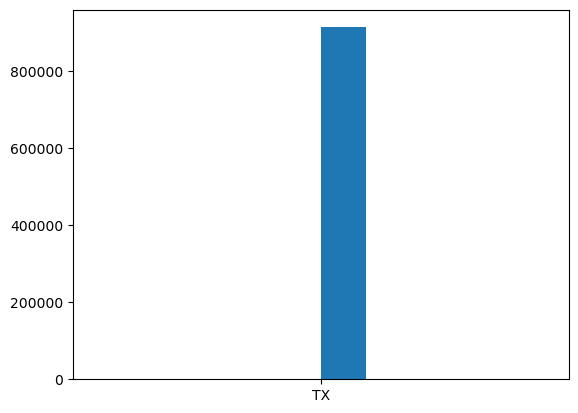

In [24]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

In [59]:
def plot_hist():
    for col in df.columns:
        print(col)
        plt.hist(df[col])
        plt.show()

## Check for Frequency

In [25]:
df.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

In [26]:
df.index.value_counts().value_counts()

500    1826
Name: sale_date, dtype: int64

### Takeaway:
Data is evenly distributed among the dates

## Check for Gaps

In [27]:
df.index.min()

Timestamp('2013-01-01 00:00:00')

In [28]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [31]:
df.index.max() - df.index.min() + pd.Timedelta('1d')

Timedelta('1826 days 00:00:00')

In [32]:
#see how many unique days we actually have
df.index.nunique()

1826

## 2. Plot the distribution of sale_amount and item_price.

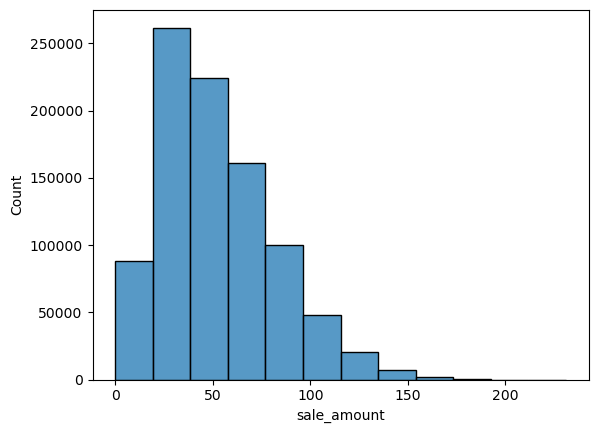

In [45]:
sns.histplot(x='sale_amount',  data=df, bins=12)
plt.show()

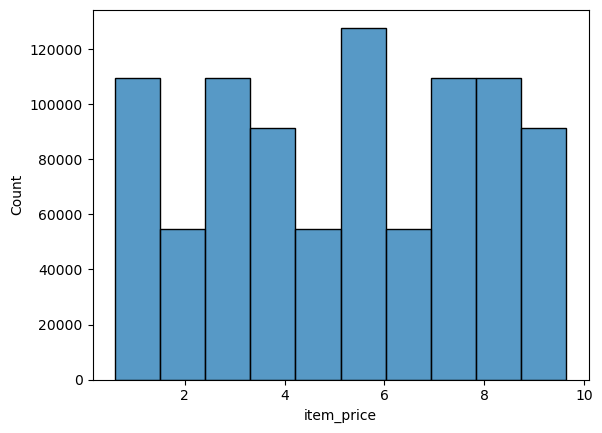

In [47]:
sns.histplot(x='item_price',  data=df, bins=10)
plt.show()

In [60]:
def plot_feature_hist(feat):

    print(feat)
    plt.hist(df[feat])
    plt.show()

## 4. Add a 'month' and 'day of week' column to your dataframe.

In [48]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [50]:
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,7,12,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,211817,26,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday


In [97]:
def mon_day_col():
    df = clean_df()
    
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    
    return df

In [99]:
mon_day_col().head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Wednesday


## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [53]:
df['sales_total'] = df.sale_amount*df.item_price

In [54]:
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,7,12,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,211817,26,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40


In [100]:
def sales_total_feat():
    df = mon_day_col()
    
    df['sales_total'] = df.sale_amount*df.item_price
    
    return df

## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [102]:
sales_total_feat().head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Wednesday,9.24


## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

## 1. Convert date column to datetime format.

In [103]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url)

In [104]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [119]:
def get_opsd():
    url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
    df = pd.read_csv(url)
    
    return df

In [120]:
df = get_opsd()

In [121]:
df.head().dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

## DataFrame Info

In [131]:
df.shape

(4383, 5)

In [136]:
df.isnull().sum()/df.shape[0]

Date           0.000000
Consumption    0.000000
Wind           0.333790
Solar          0.500799
Wind+Solar     0.501027
dtype: float64

In [139]:
df.Wind

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4378    394.507
4379    506.424
4380    584.277
4381    721.247
4382    721.176
Name: Wind, Length: 4383, dtype: float64

In [142]:
df['Wind+Solar']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4378    411.037
4379    520.586
4380    614.131
4381    728.714
4382    741.156
Name: Wind+Solar, Length: 4383, dtype: float64

In [147]:
df[df.Wind.isnull()]

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
...,...,...,...,...,...
1458,2009-12-29,1207.905,NaN,NaN,NaN
1459,2009-12-30,1192.196,NaN,NaN,NaN
1460,2009-12-31,1106.467,NaN,NaN,NaN
2173,2011-12-14,1531.311,NaN,NaN,NaN


In [145]:
len(df[df.Wind.isnull()])

1463

In [146]:
len(df[df['Wind+Solar'].isnull()])

2196

## 2. Plot the distribution of each of your variables.

In [122]:
def plot_hist():
    for col in df.columns:
        print(col)
        plt.hist(df[col])
        plt.show()

Date


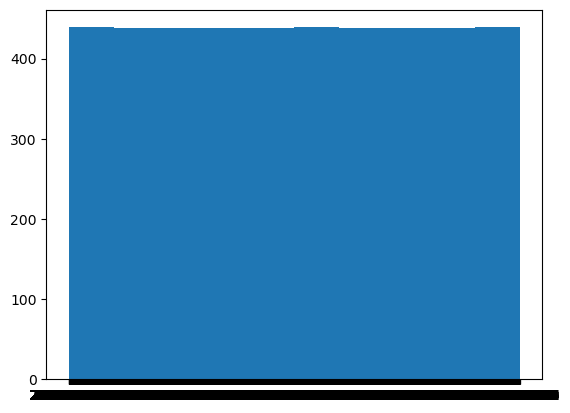

Consumption


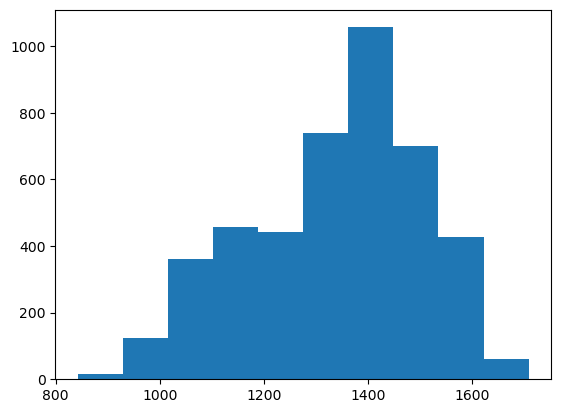

Wind


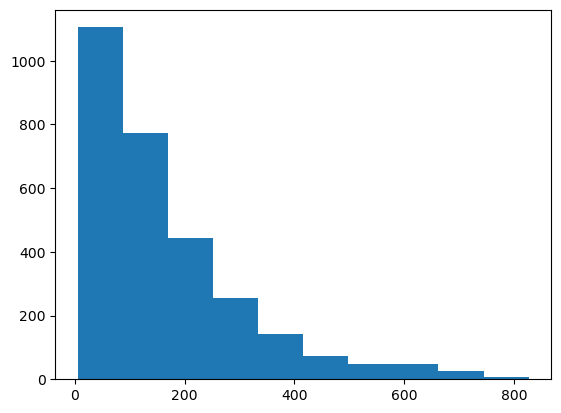

Solar


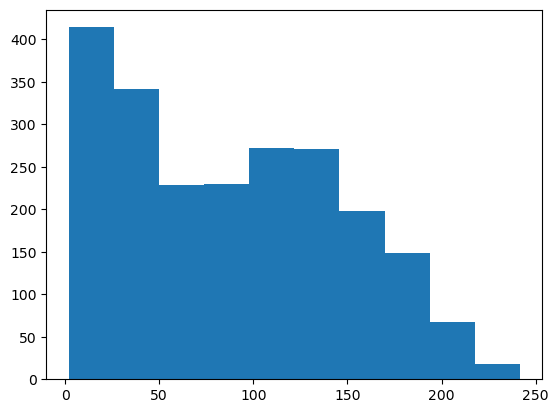

Wind+Solar


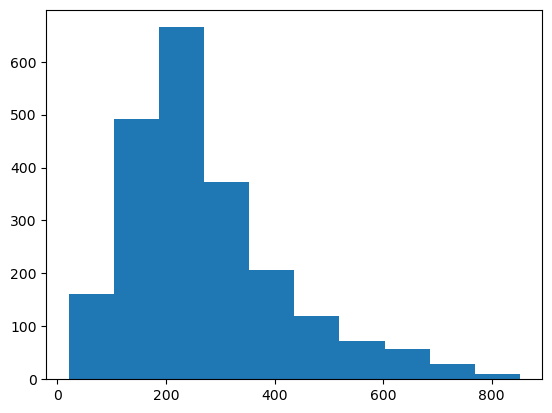

In [123]:
plot_hist()

## 3. Set the index to be the datetime variable.

In [153]:
def opsd_dt():
    df = get_opsd()
    df.Date = df.Date.astype('datetime64')
    
    return df

In [154]:
def opsd_set_dt_index():
    df = opsd_dt()
    df = df.set_index('Date')
    
    return df

In [155]:
df = opsd_set_dt_index()
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


## 4. Add a month and a year column to your dataframe.

In [161]:
def mon_day_opsd():
    df = opsd_set_dt_index()
    
    df['month'] = df.index.month_name()
    df['year'] = df.index.year

    return df

In [262]:
df = mon_day_opsd()
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


## 5. Fill any missing values.

In [170]:
df.groupby('month').mean()

,Consumption,Wind,Solar,Wind+Solar,year
month,,,,,
April,1298.457644,148.644725,119.734933,282.360956,2011.500000
August,1249.991327,109.350778,138.778575,256.876242,2011.500000
December,1374.364568,277.566526,20.068538,328.065392,2011.500000
February,1452.463841,206.942903,43.846735,271.954265,2011.504425
January,1433.781435,207.716480,19.569602,260.175301,2011.500000
July,1266.701788,112.376440,150.746720,272.875124,2011.500000
June,1263.169508,114.812058,152.569494,282.270861,2011.500000
March,1380.694497,174.218785,88.038121,283.819039,2011.500000
May,1261.905065,129.161601,139.967312,282.497296,2011.500000


In [190]:
test = pd.DataFrame(df.groupby('month').Wind.mean())
test.T['January'][0]

207.71647983870966

In [191]:
jan_df = df[(df.Wind.isnull())&(df.month=='January')]
jan_df.Wind = pd.DataFrame(df.groupby('month').Wind.mean()).T['January'][0]

In [199]:
list(df.index.month_name().unique())

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [208]:
wind_list = []

for mon in list(df.index.month_name().unique()):
    
    test = pd.DataFrame(df.groupby('month').Wind.mean())
    val_to_insert = test.T[mon][0]
    
    replace = df[(df.Wind.isnull())&(df['month']==mon)]
    replace.Wind = pd.DataFrame(df.groupby('month').Wind.mean()).T[mon][0]
    
    wind_list.append(replace)
    
# replace.Wind = pd.DataFrame(df.groupby('month').Wind.mean()).T['January'][0]

In [261]:
wind_list[0]

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,207.71648,NaN,NaN,January,2006
2006-01-02,1380.521,207.71648,NaN,NaN,January,2006
2006-01-03,1442.533,207.71648,NaN,NaN,January,2006
2006-01-04,1457.217,207.71648,NaN,NaN,January,2006
2006-01-05,1477.131,207.71648,NaN,NaN,January,2006
...,...,...,...,...,...,...
2009-01-27,1464.606,207.71648,NaN,NaN,January,2009
2009-01-28,1453.836,207.71648,NaN,NaN,January,2009
2009-01-29,1439.424,207.71648,NaN,NaN,January,2009


In [240]:
df = mon_day_opsd()

In [258]:
df[df.month=='January']

Date
2006-01-01   NaN
2006-01-02   NaN
2006-01-03   NaN
2006-01-04   NaN
2006-01-05   NaN
              ..
2017-01-27   NaN
2017-01-28   NaN
2017-01-29   NaN
2017-01-30   NaN
2017-01-31   NaN
Name: Wind, Length: 372, dtype: float64

In [259]:

for mon in list(df.index.month_name().unique()):
    i = 0
    df['Wind'] = df[df.month==mon]['Wind'].fillna(wind_list[i].Wind.values[i])
    i+=0

Date
2006-01-01          NaN
2006-01-02          NaN
2006-01-03          NaN
2006-01-04          NaN
2006-01-05          NaN
                ...    
2017-12-27    207.71648
2017-12-28    207.71648
2017-12-29    207.71648
2017-12-30    207.71648
2017-12-31    207.71648
Name: Wind, Length: 4383, dtype: float64

In [ ]:
wind_list = []

for mon in list(df.index.month_name().unique()):
    
    test = pd.DataFrame(df.groupby('month').Wind.mean())
    val_to_insert = test.T[mon][0]
    
    replace = df[(df.Wind.isnull())&(df['month']==mon)]
    replace.Wind = pd.DataFrame(df.groupby('month').Wind.mean()).T[mon][0]
    
    wind_list.append(replace)
    

277.5665263157895

In [263]:
import pandas as pd


# Step 1: Loop through unique months in the DataFrame index
for mon in df.index.month_name().unique():
    # Step 2: Calculate the mean wind for the current month
    mean_wind_month = df.loc[df.index.month_name() == mon, 'Wind'].mean()
    # Step 3: Replace the missing values for the current month with the mean wind value
    df.loc[df.index.month_name() == mon, 'Wind'].fillna(mean_wind_month, inplace=True)


In [267]:
df

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January,2006
2006-01-02,1380.52100,NaN,NaN,NaN,January,2006
2006-01-03,1442.53300,NaN,NaN,NaN,January,2006
2006-01-04,1457.21700,NaN,NaN,NaN,January,2006
2006-01-05,1477.13100,NaN,NaN,NaN,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [264]:
df

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January,2006
2006-01-02,1380.52100,NaN,NaN,NaN,January,2006
2006-01-03,1442.53300,NaN,NaN,NaN,January,2006
2006-01-04,1457.21700,NaN,NaN,NaN,January,2006
2006-01-05,1477.13100,NaN,NaN,NaN,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.